<h1 style="text-align:center; color:#2E86C1;">🏥 Exploratory Data Analysis – Healthcare Domain</h1>

### 👨‍💻 Prepared by: Mubasshir Ahmed  

---

### 🎯 Objective:
This notebook focuses on performing **exploratory data analysis (EDA)** on a healthcare dataset to identify:

- 🔍 Key patterns and trends in patient or hospital data
- ⚠️ Data quality issues: nulls, duplicates, outliers
- 📊 Relationships among features (age, charges, insurance, etc.)
- 📈 Visual insights for decision-making in a healthcare setup

---

### 🗂️ Workflow Outline:
1. **Dataset Overview & Inspection**
2. **Data Cleaning** – Handling nulls, duplicates, data types
3. **Univariate Analysis** – Distributions of individual features
4. **Bivariate Analysis** – Feature relationships & correlations
5. **Key Insights & Recommendations**

---

> Let’s begin with dataset loading and basic inspection.


In [ ]:
import pandas as pd

# Load the healthcare dataset
df = pd.read_csv(r'C:\Users\MUBASSHIR\OneDrive\Desktop\FSDS_TASKS\Projects\Healthcare-EDA-HeartRiskInsights\dataset\Healthcare_dataset.csv')

# Preview dataset structure
df_shape = df.shape
df_columns = df.columns.tolist()
df_info = df.info()

# Show first 5 rows
df_head = df.head()

df_shape, df_columns, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


((303, 14),
 ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal',
  'target'],
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  )

<h2 style="text-align:center;">📊 Dataset Overview – Initial Inspection</h2>

- **Total Rows**: 303  
- **Total Columns**: 14  
- The dataset contains **patient-level clinical features** such as age, sex, cholesterol levels, ECG results, and target outcome (heart disease presence).

### 🗂️ Column Names:
- `age`, `sex`, `cp` (chest pain), `trestbps` (blood pressure), `chol` (cholesterol),  
  `fbs` (fasting blood sugar), `restecg`, `thalach` (max heart rate), `exang`, `oldpeak`,  
  `slope`, `ca`, `thal`, `target` (disease: 0=no, 1=yes)

---


In [4]:
# ➤ Basic shape and preview of the dataset
print("Shape of dataset:", df.shape)  # ➤ (303, 14)

# ➤ Show column names
print("Column Names:\n", df.columns.tolist())

# ➤ Display first 5 rows
df.head()


Shape of dataset: (303, 14)
Column Names:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h2 style="text-align:center;">🧹 Section: Data Cleaning & Quality Checks</h2>

### 📌 Key Checks:
- **Null Values**: Check for missing data in each column
- **Data Types**: Ensure numeric columns are appropriately typed
- **Duplicate Records**: Identify and remove any duplicates
- **Basic Stats**: Use `.describe()` for outliers, distribution, etc.

---

### 🧾 Dataset Info:
- No missing values found in any column ✅  
- 1 duplicate record detected ⚠️  
- Data types: 13 integers, 1 float

---


In [5]:
# ➤ Basic info: data types + nulls
df.info()

# ➤ Summary statistics
df.describe()

# ➤ Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# ➤ Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")  # ➤ 1 duplicate found

# ➤ Remove duplicate if any
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)  # ➤ (302, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target   

<h2 style="text-align:center;">📊 Univariate Analysis – Feature Distributions</h2>

We will explore individual feature distributions using histograms and countplots to understand:

- Age range and common age groups
- Distribution of heart disease occurrence (`target`)
- Sex ratio in the dataset (0 = Female, 1 = Male)

---


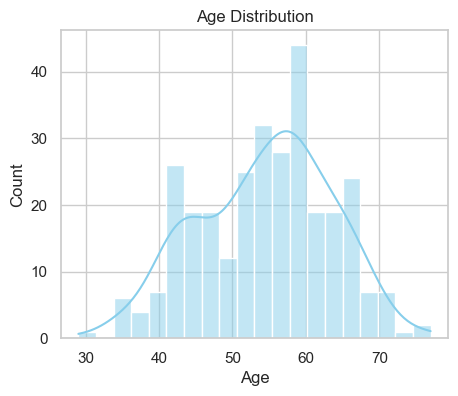

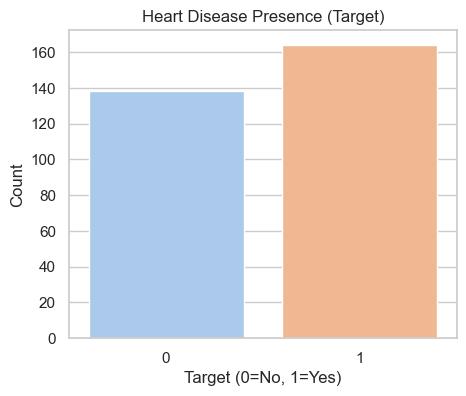

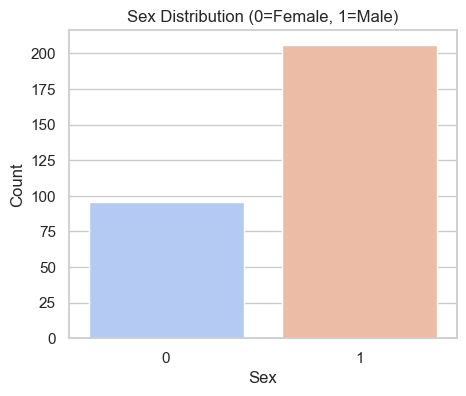

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (5, 4)

# ➤ Age Distribution
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# ➤ Target Distribution (Heart Disease)
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Heart Disease Presence (Target)')
plt.xlabel('Target (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# ➤ Sex Distribution
sns.countplot(x='sex', data=df, palette='coolwarm')
plt.title('Sex Distribution (0=Female, 1=Male)')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


<h2 style="text-align:center;">🔍 Bivariate Analysis – Feature Relationships</h2>

We now explore **relationships between pairs of variables**, especially in relation to the `target` variable (presence of heart disease).

### 📌 Key Objectives:
- Understand **how clinical features influence heart disease** risk.
- Detect any **outliers or anomalies** via visual patterns.

---


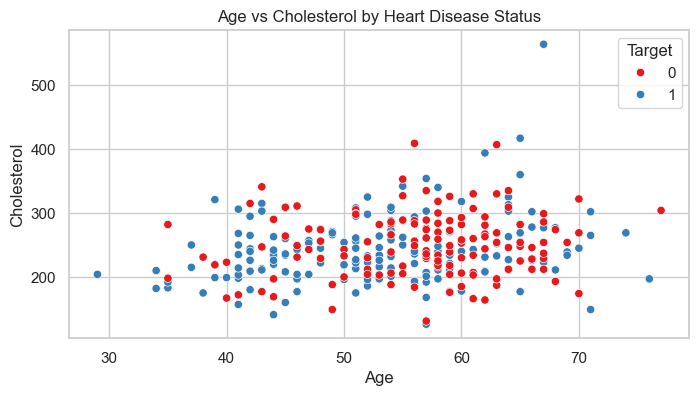

In [10]:
# ➤ Scatter Plot: Age vs Cholesterol
plt.figure(figsize=(8,4))
sns.scatterplot(x='age', y='chol', hue='target', data=df, palette='Set1')
plt.title('Age vs Cholesterol by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Target')
plt.show()


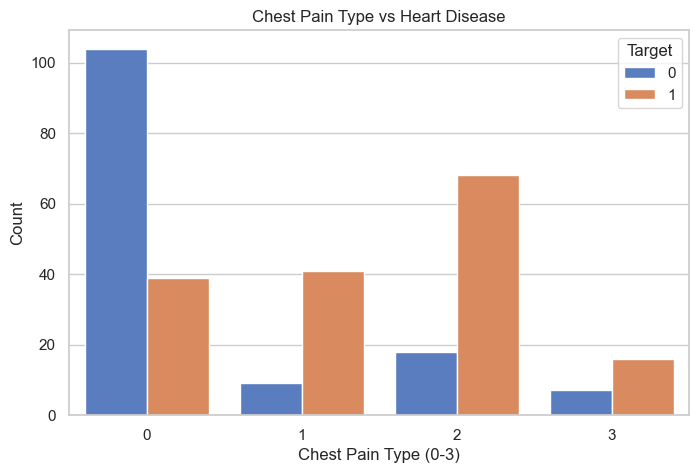

In [11]:
# ➤ Countplot: Chest Pain Type vs Target
plt.figure(figsize=(8,5))
sns.countplot(x='cp', hue='target', data=df, palette='muted')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()


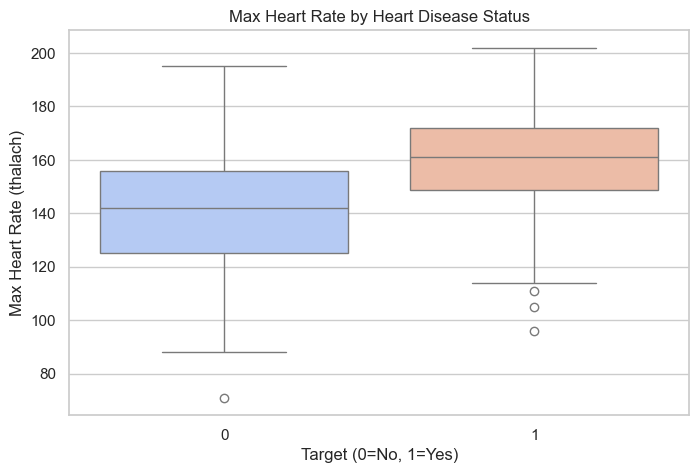

In [12]:
# ➤ Boxplot: Max Heart Rate vs Target
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='thalach', data=df, palette='coolwarm')
plt.title('Max Heart Rate by Heart Disease Status')
plt.xlabel('Target (0=No, 1=Yes)')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()


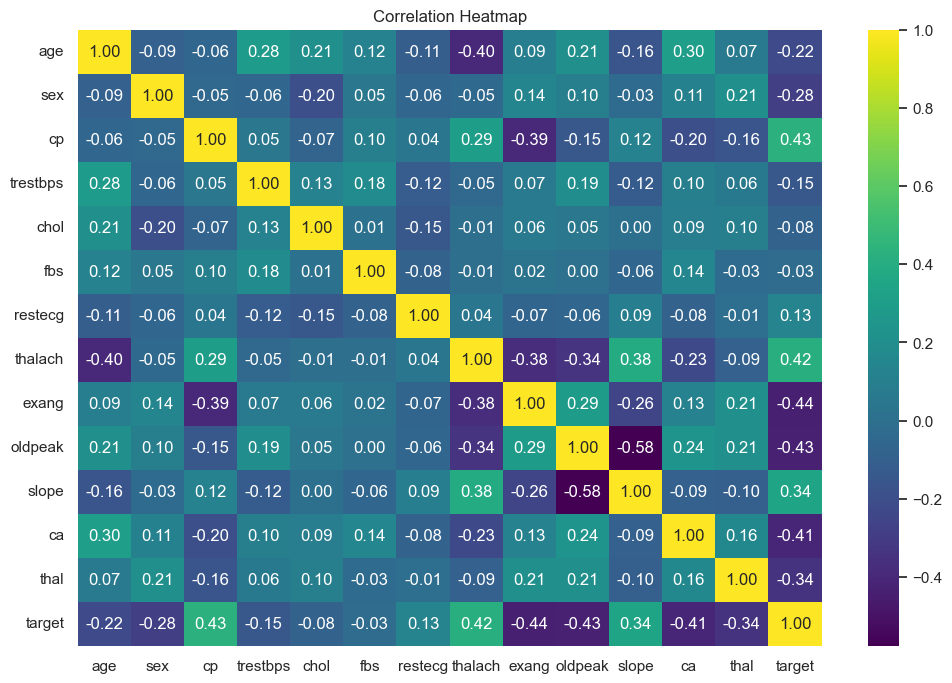

In [13]:
# ➤ Correlation Heatmap of Numerical Features
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<h2 style="text-align:center;">📝 Final Summary – Key Insights</h2>

### 🎯 Data Insights:
- Most patients are aged between **45-65 years**, with slightly more **male** patients.
- Higher **cholesterol** levels don’t always correspond to heart disease, but **chest pain type (cp)** and **max heart rate (thalach)** show strong correlation with disease.
- Features like **cp**, **thalach**, and **oldpeak** are strong predictors of heart disease (based on correlation heatmap).

---

### ✅ Actions Taken:
- Removed duplicates, verified nulls.
- Explored **univariate and bivariate plots** for key medical features.
- Identified **target-driven feature patterns**.

---

### 📌 Conclusion:
This EDA provides a clear direction for **predictive modeling** of heart disease using features like **cp**, **thalach**, and **oldpeak**. Data is now clean and ready for **ML modeling phase**.
